In [49]:
import pandas as pd
import matplotlib
from matplotlib import pyplot 
from scipy.stats import shapiro
from numpy.random import randn
from scipy.stats import normaltest

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
import random
seed = 3
random.seed(seed)

## Import data

In [6]:
WineData = pd.read_csv("/Users/federicobersani/Desktop/ABtesting/data/winequality-red.csv", sep=";")

In [7]:
WineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


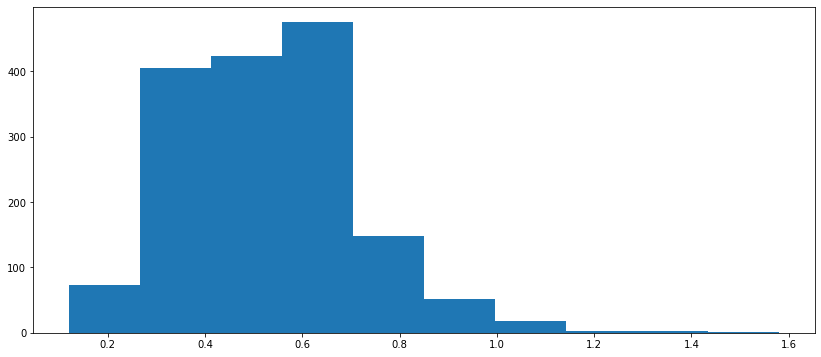

In [8]:
#Plot distribution volatile acidity - of Cheking Histogram
import matplotlib
from matplotlib import pyplot 
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(WineData['volatile acidity'])
pyplot.show()

## Test Normality of data

In [12]:
DataToTest = WineData['volatile acidity']

In [36]:
def normal_shapiro (dataset):
    stat, p = shapiro(DataToTest)
    print('stat=%.2f, p=%.30f' % (stat, p))
    if p > 0.05:
        print('Normal distribution')
    else:
        print('Not a normal distribution')

In [37]:
normal_shapiro(DataToTest)

stat=0.97, p=0.000000000000000268680677283857
Not a normal distribution


## Try a new test

In [31]:
#gerente 200 random values normal distributed
DataToTest = randn(200)

<AxesSubplot:ylabel='Density'>

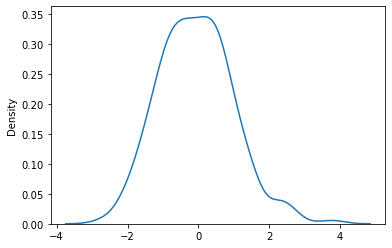

In [33]:
sns.kdeplot(DataToTest)

In [38]:
normal_shapiro(DataToTest)

stat=0.97, p=0.000000000000000268680677283857
Not a normal distribution


# Chi-squared Normality Test

Assumption: all observations are identically distrubuted, so all elements in the test have equally probability to occur, which means that every element ahould appear the same amount of times as others


In [35]:
DataToTest = WineData['volatile acidity']

In [45]:
def normal_chi_squared (dataset):
    stat, p = normaltest(DataToTest)
    print('stat=%.2f, p=%.30f' % (stat, p))
    if p > 0.05:
        print('Normal distribution')
    else:
        print('Not a normal distribution')

In [46]:
normal_chi_squared(DataToTest)

stat=143.42, p=0.000000000000000000000000000000
Not a normal distribution


# Correlation Test

## Pearson and Spearman's Rank Correlation

### Ex 1: total sulfur dioxide vs pH

In [51]:
FirstSample = WineData[1:30]['total sulfur dioxide']
SecondSample = WineData[1:30]['pH']

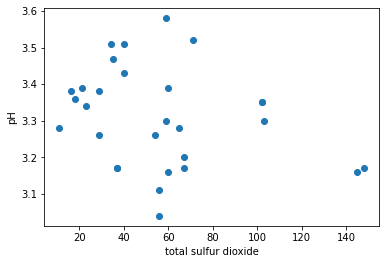

In [54]:
plt.scatter(FirstSample,SecondSample)
plt.xlabel('total sulfur dioxide')
plt.ylabel('pH')
plt.show()

### Spearman

In [57]:
from scipy.stats import spearmanr

def spearman_correlation(var1,var2):
    stat, p = spearmanr(var1,var2)

    print('stat=%.3f, p=%5f' % (stat, p))
    if p > 0.05:
        print('independent samples')
    else:
        print('dependent samples')

In [58]:
spearman_correlation(FirstSample, SecondSample)

stat=-0.258, p=0.176021
independent samples


### Pearson

In [59]:
from scipy.stats import pearsonr

def pearson_correlation (var1,var2):
    stat, p = pearsonr(var1,var2)

    print('stat=%.3f, p=%5f' % (stat, p))
    if p > 0.05:
        print('independent samples')
    else:
        print('dependent samples')

In [61]:
pearson_correlation(FirstSample, SecondSample)

stat=-0.280, p=0.141081
independent samples


### Look at correlation between variables to take 2 correlated

In [63]:
WineData[1:30].corr(method="pearson")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.325296,0.553331,0.064789,0.145997,0.369643,0.351803,0.558823,-0.554355,0.176146,-0.014915,0.232732
volatile acidity,-0.325296,1.000000,-0.808892,0.086848,-0.086997,-0.046489,-0.045020,-0.018832,0.176232,-0.058765,-0.116946,-0.323907
citric acid,0.553331,-0.808892,1.000000,0.163451,0.302150,0.273691,0.356156,0.321183,-0.402765,0.404090,0.247358,0.246825
residual sugar,0.064789,0.086848,0.163451,1.000000,-0.069497,0.278564,0.580704,0.524667,-0.011351,0.074962,0.358012,-0.324054
chlorides,0.145997,-0.086997,0.302150,-0.069497,1.000000,0.226563,0.211043,0.118830,-0.601472,0.644596,-0.342212,-0.037891
free sulfur dioxide,0.369643,-0.046489,0.273691,0.278564,0.226563,1.000000,0.854553,0.430067,-0.204240,0.156305,0.056671,0.120759
total sulfur dioxide,0.351803,-0.045020,0.356156,0.580704,0.211043,0.854553,1.000000,0.523186,-0.280118,0.210051,0.229037,-0.112902
density,0.558823,-0.018832,0.321183,0.524667,0.118830,0.430067,0.523186,1.000000,-0.181546,0.300643,-0.089917,-0.249689
pH,-0.554355,0.176232,-0.402765,-0.011351,-0.601472,-0.204240,-0.280118,-0.181546,1.000000,-0.539957,0.232744,0.007259
sulphates,0.176146,-0.058765,0.404090,0.074962,0.644596,0.156305,0.210051,0.300643,-0.539957,1.000000,-0.172364,-0.120335


### Ex 1: total sulfur dioxide vs free sulfur dioxide

In [64]:
FirstSample = WineData[1:30]['total sulfur dioxide']
SecondSample = WineData[1:30]['free sulfur dioxide']

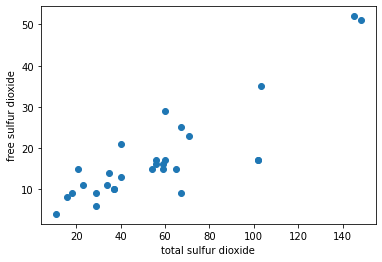

In [65]:
plt.scatter(FirstSample,SecondSample)
plt.xlabel('total sulfur dioxide')
plt.ylabel('free sulfur dioxide')
plt.show()

### Spearman

In [66]:
spearman_correlation(FirstSample, SecondSample)

stat=0.805, p=0.000000
dependent samples


### Pearson

In [67]:
pearson_correlation(FirstSample, SecondSample)

stat=0.855, p=0.000000
dependent samples


# Correlation of Categorical variables